## RFM Analysis On Stores Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import PercentFormatter
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv(r"C:\Users\parsh\OneDrive\Desktop\Datasets\RFM\data.csv",engine='python',parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("Min date: {} \nMax date: {}".format(df.InvoiceDate.min(), df.InvoiceDate.max()))

Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.drop_duplicates(inplace=True)

In [11]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### Growth in Revenue by Sales | Growth in Sales Quantity | Growth in Customer Base

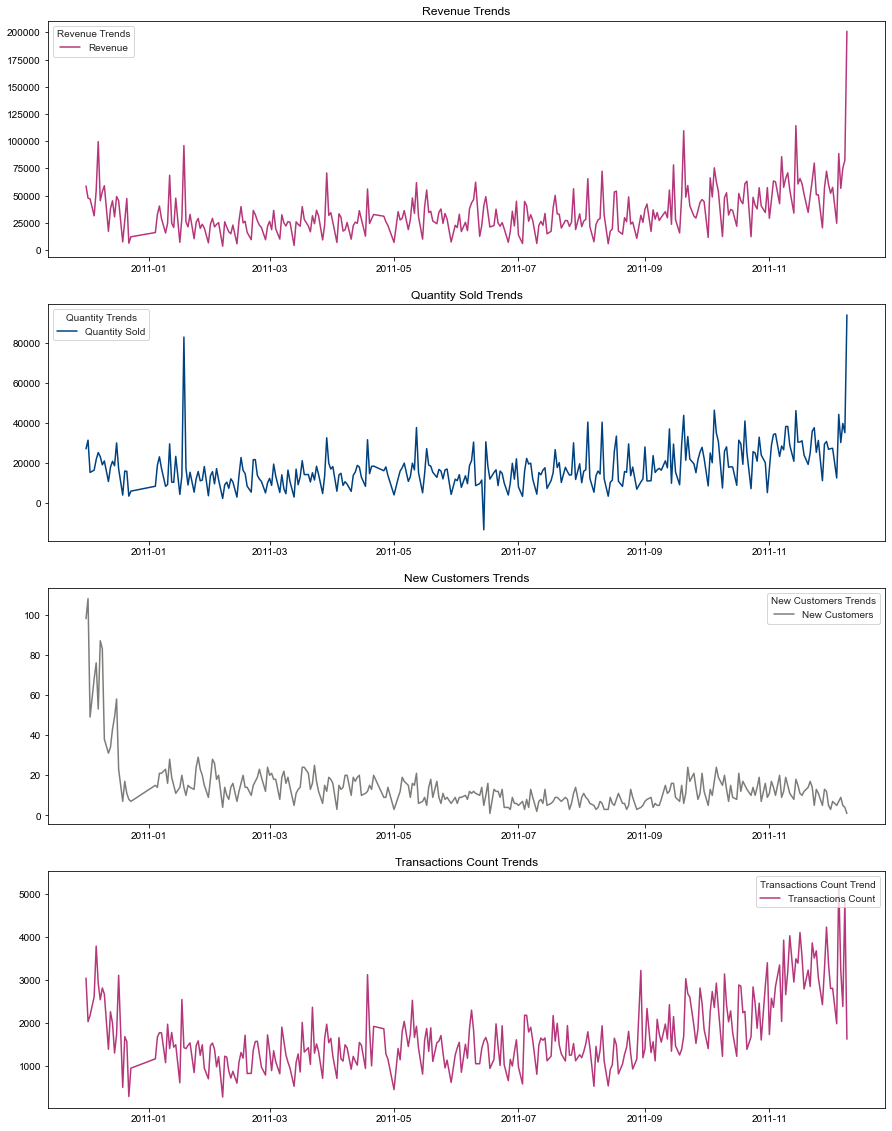

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,20))
p = df[df['TotalPrice']>=0]
p['TransactionsCount'] = 1
p = p.groupby(p['InvoiceDate'].dt.date).agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count',
                                                  'TransactionsCount':'sum'})

customer = df.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate']]
customer = customer.groupby(customer.InvoiceDate.dt.date).agg({'CustomerID':'count'})

sns.set_style("whitegrid")
sns.lineplot(data=p[['TotalPrice']], palette='magma_r', linewidth=1.5, ax=ax[0],legend=False)
ax[0].legend(title='Revenue Trends', loc='upper left', labels=['Revenue'])
ax[0].title.set_text('Revenue Trends')
ax[0].set_xlabel('')

sns.lineplot(data=p[['Quantity']], palette='ocean', linewidth=1.5, ax=ax[1])
ax[1].legend(title='Quantity Trends', loc='upper left', labels=['Quantity Sold'])
ax[1].title.set_text('Quantity Sold Trends')
ax[1].set_xlabel('')

sns.lineplot(data=customer, palette='cividis', linewidth=1.5, ax=ax[2])
ax[2].legend(title='New Customers Trends', loc='upper right', labels=['New Customers'])
ax[2].title.set_text('New Customers Trends')
ax[2].set_xlabel('')

sns.lineplot(data=p[['TransactionsCount']], palette='magma_r', linewidth=1.5, ax=ax[3])
ax[3].legend(title='Transactions Count Trend', loc='upper right', labels=['Transactions Count'])
ax[3].title.set_text('Transactions Count Trends')
ax[3].set_xlabel('')

plt.show()

In [14]:
p

,TotalPrice,Quantity,CustomerID,TransactionsCount
InvoiceDate,,,,
2010-12-01,58776.79,26896,1898,3038
2010-12-02,47629.42,31245,1959,2024
2010-12-03,46898.63,15080,1086,2171
2010-12-05,31364.63,16243,2603,2604
2010-12-06,54624.15,21542,1897,3781
...,...,...,...,...
2011-12-05,88620.84,44163,3335,5266
2011-12-06,56558.83,30042,2503,3214
2011-12-07,75315.55,39629,2135,2377


### Year wise Analysis of changes in Revenue | Quantity | Customers

In [15]:
p

,TotalPrice,Quantity,CustomerID,TransactionsCount
InvoiceDate,,,,
2010-12-01,58776.79,26896,1898,3038
2010-12-02,47629.42,31245,1959,2024
2010-12-03,46898.63,15080,1086,2171
2010-12-05,31364.63,16243,2603,2604
2010-12-06,54624.15,21542,1897,3781
...,...,...,...,...
2011-12-05,88620.84,44163,3335,5266
2011-12-06,56558.83,30042,2503,3214
2011-12-07,75315.55,39629,2135,2377


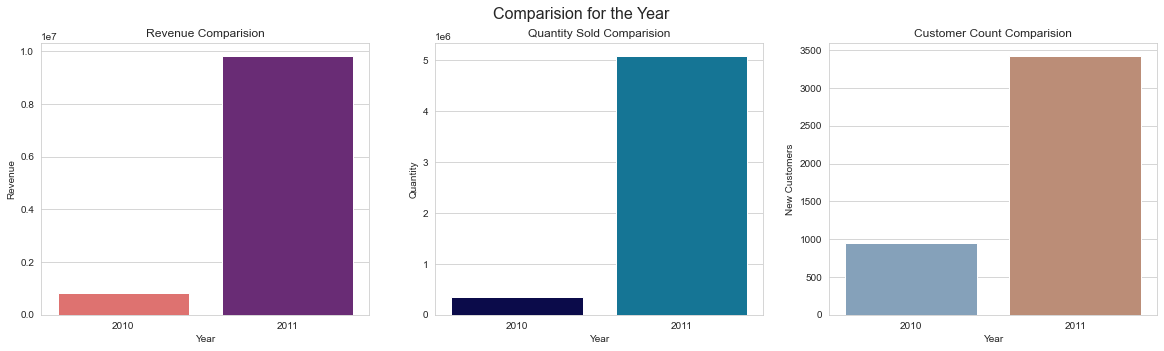

In [16]:
p = df[df['TotalPrice']>=0]
p = p.groupby(p['InvoiceDate'].dt.year).agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count'})
Year=['2010','2011']
p['Year']=Year
customer = df.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate']]
customer = customer.groupby(customer.InvoiceDate.dt.year).agg({'CustomerID':'count'})
customer['Year']=Year

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

sns.set_style("whitegrid")
sns.barplot(data=p, x='Year', y='TotalPrice', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue Comparision')
ax[0].set_ylabel('Revenue')
ax[0].set_xlabel('Year')


sns.barplot(data=p, x='Year', y='Quantity',  palette='ocean', ax=ax[1])
ax[1].title.set_text('Quantity Sold Comparision')
ax[1].set_ylabel('Quantity')
ax[2].set_xlabel('Year')


sns.barplot(data=customer, x='Year', y='CustomerID',  palette='twilight_shifted', ax=ax[2])
ax[2].title.set_text('Customer Count Comparision')
ax[2].set_ylabel('New Customers')
ax[2].set_xlabel('Year')


fig.suptitle('Comparision for the Year' ,fontsize=16)

plt.show()

### RFM Analysis

In [17]:
rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (df.InvoiceDate.max() - x.max()).days,
                                          "InvoiceNo": "nunique",
                                          "TotalPrice": "sum"})

rfm.rename(columns = {"InvoiceDate": "Recency",
                            "InvoiceNo": "Frequency",
                            "TotalPrice": "Monetary"}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [22]:
rfm["R"]  = pd.qcut(rfm['Recency'], 5, [5, 4, 3, 2, 1])
rfm["F"]  = pd.qcut(rfm['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm["M"]  = pd.qcut(rfm['Monetary'], 5, [1, 2, 3, 4, 5])

In [24]:
rfm["RFM_Segment"] = rfm["R"].astype(str) + rfm["F"].astype(str)
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,325,2,0.00,1,2,1,1,2,1,12,4
12347.0,1,7,4310.00,5,4,5,5,4,5,54,14
12348.0,74,4,1797.24,2,3,4,2,3,4,23,9
12349.0,18,1,1757.55,4,1,4,4,1,4,41,9
12350.0,309,1,334.40,1,1,2,1,1,2,11,4


In [28]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,R,F,M,RFM_Segment,RFM_Score,Segment
0,12346.0,325,2,0.00,1,2,1,1,2,1,12,4,Hibernating
1,12347.0,1,7,4310.00,5,4,5,5,4,5,54,14,Champions
2,12348.0,74,4,1797.24,2,3,4,2,3,4,23,9,At-Risk
3,12349.0,18,1,1757.55,4,1,4,4,1,4,41,9,Promising
4,12350.0,309,1,334.40,1,1,2,1,1,2,11,4,Hibernating


In [29]:
rfm.groupby('Segment').agg({"CustomerID":"count"}).sort_values("CustomerID",ascending=False)

,CustomerID
Segment,
Hibernating,1058
Loyal Customers,811
Champions,645
At-Risk,607
Potential Loyalists,496
About To Sleep,361
Need Attention,184
Promising,99
Cannot lose them,70


### RFM Visualization

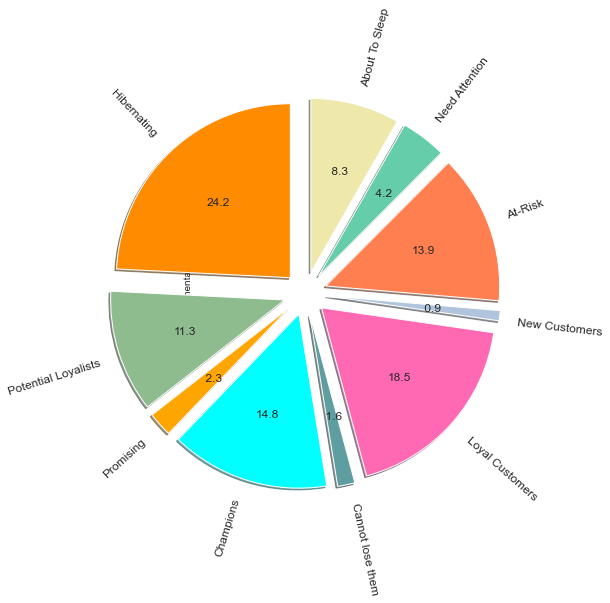

In [30]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

rfm["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("Customer Segmentation Count");